(-1.379375, 7.791875, -1.379375, 7.791875)

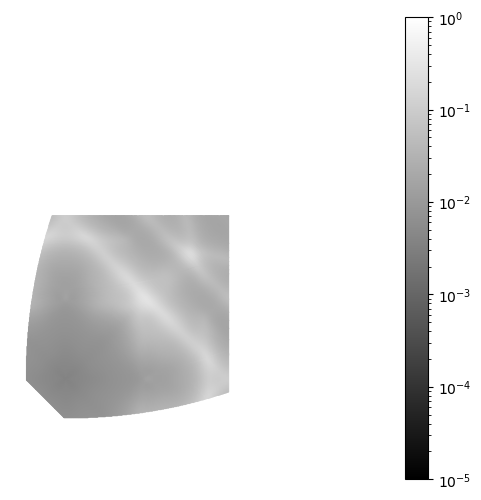

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


### load data
qr = np.loadtxt('qrange.dat') # range of q
qedge = np.max(qr) # the edge of qr
diq = np.loadtxt('diffuse_scattering_signal_t0.dat') # diq at t=0
qcoord = np.loadtxt('qplot.dat') # q in Cartesian coordinates 
qx = qcoord[:, 0]
qy = qcoord[:, 1]

diq_norm = (diq - np.min(diq)) / (np.max(diq)-np.min(diq))

### plot
fig, ax = plt.subplots(1, 1, figsize=(6,6))

norm = LogNorm(vmin=1E-5, vmax=1.0)
cmap = 'binary_r'
mesh = ax.scatter(qx, qy, c=diq_norm, s=0.2, norm=norm, cmap=cmap)

# only plot within the square
mask = (qx < -qedge) | (qx > qedge) | (qy < -qedge) | (qy > qedge)
mesh.set_alpha(np.where(mask, 0, 1))

fig.colorbar(mesh, ax=ax)    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim([-qedge,qedge])
ax.set_ylim([-qedge,qedge])
ax.axis('equal')